<a href="https://colab.research.google.com/github/shaon11579/DNN-fall-2021/blob/main/Assignment_2_NN_Up0926_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction
In this eassy, I will be implementing Two Deep Learning Models using CIFAR-10, and Scene-15 datasets. First, the CIFAR-10 dataset is commonly used in Deep Learning for testing models of Image Classification. It has 60,000 color images comprising of 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images. Second, The Scene-15 dataset contains different pictures with 15 different classes as shown above. A total of 4485 images are available in 15 different classes among which we are going to use 100 images for training and the rest are for the tests. We have 1500 images for training and 2985 images for testing.  

#  Methodology: CIFAR-10 and Scene-15 Data 

## Importing data: 
Deep Learning models require machine with high computational power. For this task, I have implemented the project on Google Collaboratory. For the project I will be using TensorFlow and matplotlib library and other packages as needed. 

## Pre-Processing the Data
Next, pre-process the data. I will be defining the names of the classes, over which the dataset is distributed. There are 10 different classes of color images of size 32x32 and 64x64, I used size 32x32. Next, I have set the class name and normalize the image so that our model can train faster. The pixel range of a color image is 0–255. I have divided each pixel of the image by 255 so the pixel range is between 0–1. More spacifically,it is devided by 255.0 as it is a float operation. 

# Deep Learning Architecture
In the output of shape we see 4 values e.g. (50000,32,32,3). These 4 values are as follows: the first value, i.e.(50,000/10,000) shows the number of images. The second and third value shows the image size, i.e. image height and width. Here the image size is 32x32.

## Building CNN model

A CNN model works in three stages. In the first stage, a convolutional layer extracts the features of the image/data. In the second stage a pooling layer reduces the dimensionality of the image, so small changes do not create a big change on the model. Simply saying, it prevents over-fitting. In the third stage a flattening layer transforms our model in one-dimension and feeds it to the fully connected dense layer. This dense layer then performs prediction of image. A good model has multiple layers of convolutional layers and pooling layers.


## Parameters of the Conv2D layers
- The first parameter is “filters”. The number. Value of the filters show the number of filters from which the CNN model and the convolutional layer will learn from 
- second parameter is “kernel-size”. Kernel means a filter which will move through the image and extract features of the part using a dot product. Kernel-size means the dimension (height x width) of that filter. The value of the kernel size if generally an odd number e.g. 3,5,7.. etc. Here I have used kernel-size of 3, which means the filter size is of 3 x 3.

- next parameter is “padding”. There are two types of padding, SAME & VALID. In VALID padding, there is no padding of zeros on the boundary of the image. So that when convolution takes place, there is loss of data, as some features can not be convolved.

## Pooling layer

Pooling layer is used to reduce the size of the image along with keeping the important parameters in role. Thus it helps to reduce the computation in the model. Max Pooling is  used in this example.
- next, Strides means how much jump the pool size will make. If the stride is 1, the 2x2 pool will move in right direction gradually from one column to other column. I have used the stride 2.
-  Pooling I use the padding “Valid”, because we are ready to loose some information

## Last Layers
Now the Dense layer requires the data to be passed in 1dimension, so flattening layer is quintessential.

In addition,  to prevent overfitting, a dropout layer is added. During training of data, some neurons are disabled randomly. The value passed to neurons mean what fraction of neuron one wants to drop during an iteration.

## Output Layer

- In the output, the layer uses the number of units as per the number of classes in the dataset. Here I are using 10, as there are 10 units. In the output I use SOFTMAX activation as it gives the probabilities of each class.

- In this scenario the classes are totally distinctive so I have used Sparse Categorical Cross-Entropy.
- For first model I have used SGD optimizer, and for model 2 I have used SGD, ADM and RMSprop. Adam is an abbreviation for “Adaptive Learning rate Method”. This optimizer uses the initial of the gradient to adapt to the learning rate. Adam is now used instead of the stochastic gradient descent, which is used in ML, because it can update the weights after each iteration. Next, Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). Finally, the RMSprop optimizer, which helps to restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. The difference between RMSprop and gradient descent is on how the gradients are calculated

- 
#  Methodology: Scene-15
The Scene-15 dataset contains different pictures with 15 different classes as shown above. A total of 4485 images are available in 15 different classes among which we are going to use 100 images for training and the rest are for the tests. We have 1500 images for training and 2985 images for testing

## Splitting the data

It is important to split the data in training and testing. But here we have 15 different folders available so first try to split the data into the train/test folder.
- Next, the train & test images data we have to store them at a different place for future use.
-  make the function to write the images to the folder 

## Load data
Next, I have loaded the images from the stored path and convert those into an array to perform image classification.

- After creating the function of loading images from a given path and converting it into an array we need to generate our x_train, y_train and x_test,y_test data.

## Creating the transfer learning model

Now, before generating the model, there are few things that need to be clear. The first one is what is transfer learning, in simple words transfer learning is a technique that uses the weights of other pre-trained models in order to get more accuracy. Let’s begin the procedure
## Fitting the data

compiling the model, I need to fit the model with train and test data.


# Result and Conclusion 

**CIFAR-10** : Using the model I was able to get an accuracy of 79%. So, in this article I go through working of Deep Learning project using Google Collaboratory. I have discussed and showed (See appndix)about the parameters used in Convolutional Layer and Pooling layer of Convolutional Neural Network. After extracting features in a CNN, I have incorporated a dense layer and a dropout to implement this features in recognizing the images. 
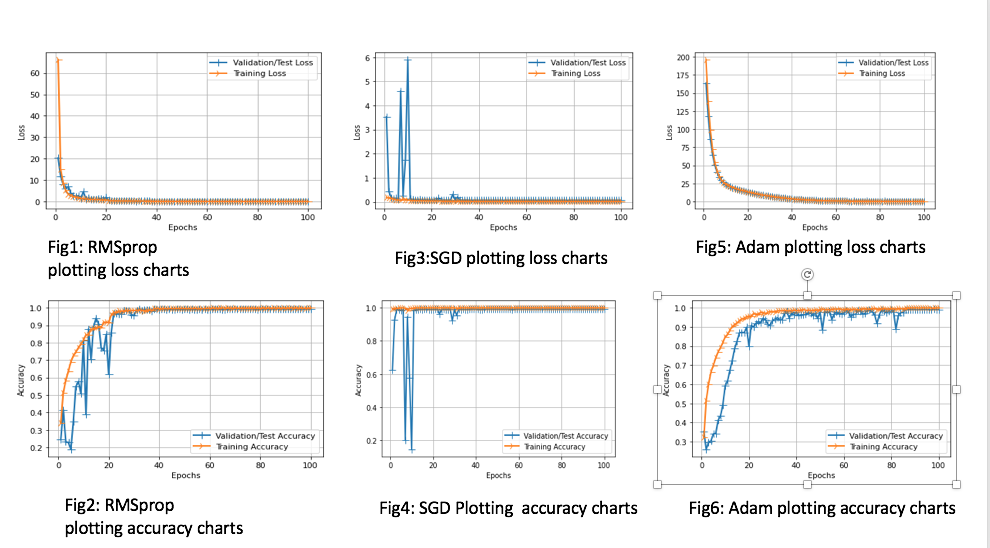

**Scene-15Here** : I’ve run the entire model 3 times in order to achieve the best average accuracy. By implementing this code I’m able to achieve 99%  accuracy. Aslao, as shown in the Figure 1 to 6 , I have used RMSprop, SGD andAdam optimizer. By looking accuracy score of  model 1(CIFAR-10), and model-2 (15-scene), models 2  shows better outcome with higher accuracy score. 



**Note**  See notebook for All Training and testing logs


# **Apendix: Python Code and all training and testing logs for questuion 1 and 2 models**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 
from sklearn.model_selection import train_test_split


In [ ]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

x_train = x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

NameError: ignored

In [ ]:
x_train = x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

NameError: ignored

In [ ]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,
                                         padding="same", activation="relu", input_shape=[32,32,3]))

In [ ]:
#MaxPoolingLayer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2, padding='valid'))

In [ ]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [ ]:
# Droput Layer
cifar10_model.add(Dropout(0.2))
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units= 128,activation='relu'))

NameError: ignored

# Solution to question 1 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

# Loading the dataset

In [3]:

# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# Normalizing the Images

In [4]:

x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

# Randomly Checking a image

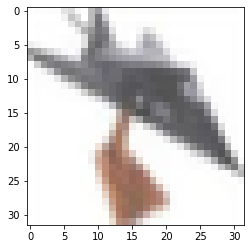

In [6]:
plt.imshow(x_test[215])

# Building a Convolutional Neural Network

In [8]:
cifar10_model=tf.keras.models.Sequential()

In [9]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [10]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [11]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [12]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [13]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [14]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [15]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [16]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [17]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [18]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [19]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# Compiling the Model

In [20]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["sparse_categorical_accuracy"])

# Training the Model

In [21]:
cifar10_model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 22s 4ms/step - loss: 2.0208 - sparse_categorical_accuracy: 0.2592
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6230 - sparse_categorical_accuracy: 0.4158
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4669 - sparse_categorical_accuracy: 0.4700
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3439 - sparse_categorical_accuracy: 0.5137
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2544 - sparse_categorical_accuracy: 0.5508
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1810 - sparse_categorical_accuracy: 0.5803
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1164 - sparse_categorical_accuracy: 0.6034
Epoch 8/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0529 - sparse_categorical_accuracy: 0.6270
Epoch 9/100
1563/1563 [

In [23]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9238 - sparse_categorical_accuracy: 0.7952


In [24]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.795199990272522


# Dataset: 15-scene
Explore the deep learning codes for the 15-Scene dataset. Download dataset from any of the following
links:
https://figshare.com/articles/15-Scene_Image_Dataset/7007177
https://www.kaggle.com/zaiyankhan/15scene-dataset
  Download the datasets and prepare as required for training and testing. You can resize the data to 32x32 or 64x64 (depending on the availability of hardware). Use 70% of samples for training and the remaining 30% for testing per category.

# Scene-15 Image classification problem with Transfer Learning

In [ ]:
# libraries 
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l1,l1_l2,l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import HeUniform

from sklearn.utils import class_weight
from shutil import copy2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from collections import Counter
import numpy as np
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.multiclass import unique_labels

from tensorflow.keras import activations 
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Preprocessing

In [ ]:

num_classes = 15
img_rows, img_cols = 64,64
batch_size =32
train_data_dir ="/content/drive/MyDrive/data/train"
validation_data_dir = "/content/drive/MyDrive/data/validation"

# data augmentaiton 
train_datagen = ImageDataGenerator()
#rescale=1./255)
validation_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 4468 images belonging to 15 classes.
Found 1362 images belonging to 15 classes.


In [ ]:

model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(39, (3, 3), padding = 'same', input_shape = (img_rows, img_cols,1),kernel_regularizer=l2(0.38),
                 kernel_initializer=HeUniform()))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

## 3rd conv-pool layer
model.add(Conv2D(256, (3, 3), padding="same",kernel_regularizer=l2(0.38), kernel_initializer=HeUniform()))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(621))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.0530))


# Final Dense Layer
model.add(Dense(num_classes,activation='softmax',name='Hafizzo'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 39)        390       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 39)        156       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 39)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 39)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 39)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        22528     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        2

In [ ]:

checkpoint = ModelCheckpoint("cnn_scene_Reluv2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.000001)

# call backs into a callback list
callbacks = [ checkpoint,reduce_lr]

# RMS prop learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001,momentum=0.9),
              metrics = ['accuracy'])


epochs = 100
import time
time_start=time.perf_counter()

history= model.fit_generator(   
    
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator)
elapsed_time=time.perf_counter()-time_start

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
140/140 [==============================] - 24s 167ms/step - loss: 66.1528 - accuracy: 0.3402 - val_loss: 20.3360 - val_accuracy: 0.2445

Epoch 00001: val_loss improved from inf to 20.33596, saving model to cnn_scene_Reluv2.h5
Epoch 2/100
140/140 [==============================] - 27s 190ms/step - loss: 15.0857 - accuracy: 0.5121 - val_loss: 11.7086 - val_accuracy: 0.4156

Epoch 00002: val_loss improved from 20.33596 to 11.70856, saving model to cnn_scene_Reluv2.h5
Epoch 3/100
140/140 [==============================] - 27s 190ms/step - loss: 8.7315 - accuracy: 0.5833 - val_loss: 8.1304 - val_accuracy: 0.2335

Epoch 00003: val_loss improved from 11.70856 to 8.13038, saving model to cnn_scene_Reluv2.h5
Epoch 4/100
140/140 [==============================] - 26s 188ms/step - loss: 5.2419 - accuracy: 0.6361 - val_loss: 6.1762 - val_accuracy: 0.2283

Epoch 00004: val_loss improved from 8.13038 to 6.17617, saving model to cnn_scene_Reluv2.h5
Epoch 5/100
140/140 [===================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


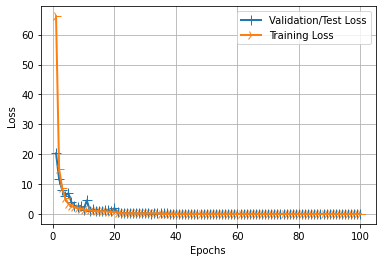

In [ ]:
print(history.history.keys())
# Plotting loss charts for RMS prop 
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss.png', dpi = 1200)
plt.show()

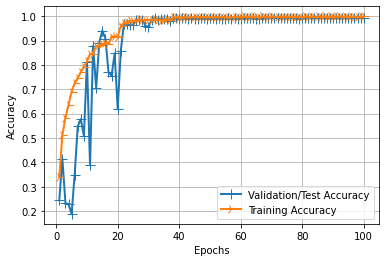

In [ ]:

# Plotting accuracy charts for RMS prop 
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy.png', dpi = 1200)
plt.show()

In [ ]:
checkpoint = ModelCheckpoint("cnn_scene_Reluv2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.000001)

# call backs into a callback list
callbacks = [ checkpoint,reduce_lr]

# SGD learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(lr=0.0001,momentum=0.9),
              metrics = ['accuracy'])


epochs = 100
import time
time_start=time.perf_counter()

history= model.fit_generator(   
    
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator)
elapsed_time=time.perf_counter()-time_start

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
140/140 [==============================] - 10s 63ms/step - loss: 0.1836 - accuracy: 0.9931 - val_loss: 3.5284 - val_accuracy: 0.6248

Epoch 00001: val_loss improved from inf to 3.52840, saving model to cnn_scene_Reluv2.h5
Epoch 2/100
140/140 [==============================] - 9s 62ms/step - loss: 0.1572 - accuracy: 0.9980 - val_loss: 0.4313 - val_accuracy: 0.9266

Epoch 00002: val_loss improved from 3.52840 to 0.43129, saving model to cnn_scene_Reluv2.h5
Epoch 3/100
140/140 [==============================] - 9s 62ms/step - loss: 0.1389 - accuracy: 0.9971 - val_loss: 0.1677 - val_accuracy: 0.9890

Epoch 00003: val_loss improved from 0.43129 to 0.16775, saving model to cnn_scene_Reluv2.h5
Epoch 4/100
140/140 [==============================] - 9s 61ms/step - loss: 0.1060 - accuracy: 0.9996 - val_loss: 0.1437 - val_accuracy: 0.9897

Epoch 00004: val_loss improved from 0.16775 to 0.14372, saving model to cnn_scene_Reluv2.h5
Epoch 5/100
140/140 [==============================] - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


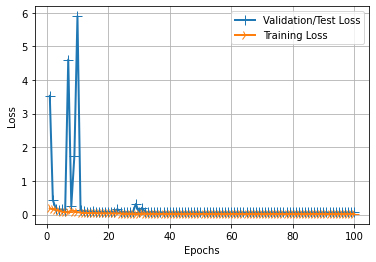

In [ ]:
print(history.history.keys())
# SGD Plotting loss charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss.png', dpi = 1200)
plt.show()

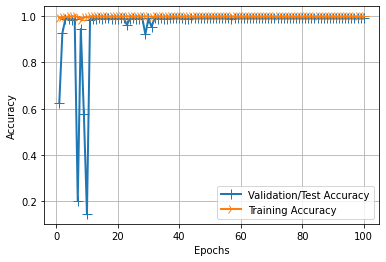

In [ ]:
# SGD Plotting accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy.png', dpi = 1200)
plt.show()

In [ ]:
checkpoint = ModelCheckpoint("cnn_scene_Reluv2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.000001)

#  callback list
callbacks = [ checkpoint,reduce_lr]

# Adam learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics = ['accuracy'])


epochs = 100
import time
time_start=time.perf_counter()

history= model.fit_generator(   
    
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator)
elapsed_time=time.perf_counter()-time_start

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
140/140 [==============================] - 1385s 10s/step - loss: 195.9505 - accuracy: 0.3221 - val_loss: 163.8016 - val_accuracy: 0.3539

Epoch 00001: val_loss improved from inf to 163.80157, saving model to cnn_scene_Reluv2.h5
Epoch 2/100
140/140 [==============================] - 9s 61ms/step - loss: 138.4879 - accuracy: 0.5150 - val_loss: 117.8020 - val_accuracy: 0.2599

Epoch 00002: val_loss improved from 163.80157 to 117.80202, saving model to cnn_scene_Reluv2.h5
Epoch 3/100
140/140 [==============================] - 8s 60ms/step - loss: 99.3546 - accuracy: 0.6021 - val_loss: 86.0122 - val_accuracy: 0.2959

Epoch 00003: val_loss improved from 117.80202 to 86.01219, saving model to cnn_scene_Reluv2.h5
Epoch 4/100
140/140 [==============================] - 9s 61ms/step - loss: 72.6430 - accuracy: 0.6645 - val_loss: 64.7543 - val_accuracy: 0.3047

Epoch 00004: val_loss improved from 86.01219 to 64.75426, saving model to cnn_scene_Reluv2.h5
Epoch 5/100
140/140 [==========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


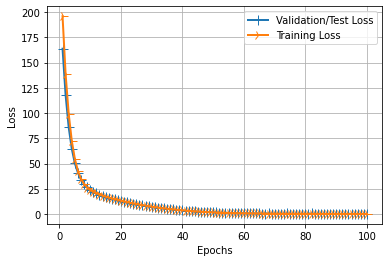

In [ ]:
print(history.history.keys())
# Plotting Adam loss charts
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss.png', dpi = 1200)
plt.show()

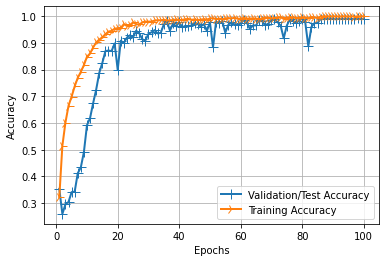

In [ ]:
# Plotting Adam accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('Accuracy.png', dpi = 1200)
plt.show()